## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №2

Задание выполнил(а): Ханаев Антон

### Общая информация

__Дата выдачи:__ 25.02.2019

__Дедлайн:__ 23:59 5.03.2019

### О задании

В данном домашнем задании вы реализуете линейную регрессию своими руками и сравните её с версией в scikit-learn.

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_02_Фамилия_Имя.ipynb

## Часть 1. Обыкновенная линейная регрессия

In [1]:
import numpy as np
import pandas as pd

### 1 (4 балла). 
На семинаре мы начали реализовывать класс линейной регрессии; теперь необходимо его закончить. 

In [2]:
class LinReg():
    def __init__(self, step_size=0.1, num_steps=20, eps=1e-6):
        self.w = None
        self.bias_w = None
        self.b = None
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
        self.mse = 0
        
        
    def __calc_grad(self, X_train, y_train):
        # Одна итерация градиента
        dot_product = np.dot(X_train, self.w) + self.bias_w[0]
        each_instances_error = dot_product.T - y_train
        self.mse = np.mean(each_instances_error ** 2, axis=0)
        dw = np.dot(2 / X_train.shape[0] * X_train.T, each_instances_error)
        db = 2 / X_train.shape[0] * each_instances_error
        # Обновление весов
        self.w -= self.step_size * dw
        self.b -= self.step_size * db
    
    def fit(self, X_train, y_train):
        # Инициализация весов
        np.random.seed(42)
        self.w = np.random.randn(X_train.shape[1])
        self.b = np.ones(X_train.shape[0])
        self.bias_w = np.zeros(1)
        
        difference = np.ones(1)
        step_id = 0
        current = 0
        
        # Собственно сам градиентный спуск
        while (difference > self.eps).all() and step_id < self.num_steps:
            previous = self.w.copy()
            self.__calc_grad(X_train, y_train)
            print('Epoch: {}\nMSE: {}\n'.format((step_id + 1), self.mse))
            difference = np.abs(self.w - previous)
            step_id += 1

        
    def predict(self, X_test):
        return np.dot(X_test, self.w) + self.b[0]

### 2 (3 балла). 
Проверим корректность работы класса на датасете Boston Housing. 
* Загрузите его из sklearn
* Проведите предобработку данных(нормализация вещественных признаков, one-hot encoding категориальных)
* Разделите на обучение и контроль в соотношении 80:20 с random_seed 42 (самый популярный в прошлом задании)
* Обучите собственную реализацию регрессии и сравните по метрикам MAE и RMSE с LinearRegression из sklearn.

In [3]:
from sklearn.datasets import load_boston
data = load_boston()

In [4]:
feat_names = data['feature_names']
target = data['target']
df = pd.DataFrame(data['data'], columns=feat_names)

In [5]:
df.shape

(506, 13)

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The only categorical feature: CHAS

All others are numerical.
Also, no nan values.

In [9]:
numerical_feat = feat_names[feat_names != 'CHAS']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train_unprep, X_test_unprep, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [13]:
transformer = ColumnTransformer(transformers=[
    ('One hot', OneHotEncoder(), ['CHAS']),
    ('Std scaler', StandardScaler(), numerical_feat)
])
X_train = transformer.fit_transform(X_train_unprep)
X_test = transformer.transform(X_test_unprep)

/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [14]:
X_train_unprep.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [15]:
lr = LinReg(num_steps=500, eps=1e-7)
lr.fit(X_train, y_train)

Epoch: 1
MSE: 546.6450393062012

Epoch: 2
MSE: 380.3034459881084

Epoch: 3
MSE: 274.5976481024355

Epoch: 4
MSE: 203.79813627935144

Epoch: 5
MSE: 156.08776125859364

Epoch: 6
MSE: 123.8054153972342

Epoch: 7
MSE: 101.84594714054427

Epoch: 8
MSE: 86.80022026840992

Epoch: 9
MSE: 76.39049063674126

Epoch: 10
MSE: 69.0942223720245

Epoch: 11
MSE: 63.89315268866836

Epoch: 12
MSE: 60.10584885867003

Epoch: 13
MSE: 57.27594670575047

Epoch: 14
MSE: 55.0975335115384

Epoch: 15
MSE: 53.365315632879344

Epoch: 16
MSE: 51.94132784055641

Epoch: 17
MSE: 50.73268562892462

Epoch: 18
MSE: 49.676711550785875

Epoch: 19
MSE: 48.730986992782356

Epoch: 20
MSE: 47.86669488363812

Epoch: 21
MSE: 47.064161993192236

Epoch: 22
MSE: 46.309871962699276

Epoch: 23
MSE: 45.594462159838635

Epoch: 24
MSE: 44.91137898710845

Epoch: 25
MSE: 44.25597414257351

Epoch: 26
MSE: 43.62489638344835

Epoch: 27
MSE: 43.01568148255231

Epoch: 28
MSE: 42.42647524077235

Epoch: 29
MSE: 41.855845928306664

Epoch: 30
MSE: 

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

RMSE of my own implementation of linear regression

In [19]:
np.sqrt(mean_squared_error(lr.predict(X_test), y_test))

5.0393564350471225

MAE of my own implementation of linear regression

In [20]:
mean_absolute_error(lr.predict(X_test), y_test)

3.6814051483503283

RMSE of sklearn linear regression

In [21]:
np.sqrt(mean_squared_error(clf.predict(X_test), y_test))

4.9286021826653394

MAE of sklearn linear regression

In [22]:
mean_absolute_error(clf.predict(X_test), y_test)

3.1890919658878487

Так как в sklearn задача решается аналитическим способом (normal equation), а реализация через градиент пытается максимально аппроксимировать аналитическое решение, получаем небольшую разницу в перформансе моделей.

### 3 (3 балла). 
Линейная регрессия зачастую легко переобучается - модель необходимо штрафовать за величину весов; для этого применяют L1 и L2 регуляризацию: добавление нормы весов к функции потерь. В случае L2-регулязации функционал будет выглядеть как

$$ L = (Xw - y)^T(Xw - y) + \lambda||w||_2 $$.

Параметр $\lambda$ подбирается на отложенной выборке или по кросс-валидации.

* Реализуйте обучение линейной регрессии с L2-регуляризацией
* Найдите оптимальный с точки зрения метрики MAE коэффициент $\lambda$ (по кросс-валидации)
* Постройте график зависимости метрики на тестовой выборке от $\lambda$ (__подпишите оси__)
* Сравните результаты с Ridge регрессией из sklearn (аналогично пункту 2).

In [23]:
class LinReg_l2():
    def __init__(self, step_size=0.1, num_steps=20, eps=1e-6, lamb=0.1, output=True):
        self.w = None
        self.bias_w = None
        self.b = None
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
        self.loss = []
        self.lamb = lamb
        self.output = output

    def __calc_grad(self, X_train, y_train):
        # Одна итерация градиента
        dot_product = np.dot(X_train, self.w) + self.bias_w[0]
        each_instances_error = dot_product.T - y_train
        # l2 regularization
        self.loss.append(np.mean(each_instances_error ** 2, axis=0) + self.lamb * np.linalg.norm(self.w))
        dw = np.dot(2 / X_train.shape[0] * X_train.T, each_instances_error) + 2 * self.lamb * self.w
        db = 2 / X_train.shape[0] * each_instances_error
        # Обновление весов
        self.w -= self.step_size * dw
        self.b -= self.step_size * db
    
    def fit(self, X_train, y_train):
        # Инициализация весов
        np.random.seed(42)
        self.w = np.random.randn(X_train.shape[1])
        self.b = np.ones(X_train.shape[0])
        self.bias_w = np.zeros(1)
        
        difference = np.ones(1)
        step_id = 0
        current = 0
        loss_scores = []
        
        # Собственно сам градиентный спуск
        while (difference > self.eps).all() and step_id < self.num_steps:
            previous = self.w.copy()
            self.__calc_grad(X_train, y_train)
            if self.output:
                print('Epoch: {}\nLoss: {}\n'.format((step_id + 1), self.loss[step_id]))
            difference = np.abs(np.linalg.norm(self.w - previous))
            step_id += 1

        
    def predict(self, X_test):
        return np.dot(X_test, self.w) + self.b[0]

In [24]:
from sklearn.model_selection import KFold

In [25]:
kfold = KFold(n_splits=5, random_state=42)
lambda_values = np.linspace(1, 10, 10) / 100

# Ручная кросс-валидация из-за того, что надо вытащить значения
# функции потерь на каждой итерации
loss = {}
scores = {}
for lamb in lambda_values:
    cv_scores = []
    for train_idx, test_idx in kfold.split(X_train, y_train):
        lr_l2 = LinReg_l2(num_steps=100, eps=1e-7, lamb=lamb, output=False)
        lr_l2.fit(X_train[train_idx], y_train[train_idx])
        cv_scores.append(mean_absolute_error(lr_l2.predict(X_train[test_idx]), y_train[test_idx]))
    scores[lamb] = np.mean(cv_scores)
    loss[lamb] = lr_l2.loss

In [26]:
scores

{0.01: 3.8339634000341833,
 0.02: 3.8261645313208397,
 0.03: 3.8254720444154193,
 0.04: 3.830727484337865,
 0.05: 3.841259873000321,
 0.06: 3.8564887641611802,
 0.07: 3.8826223624405047,
 0.08: 3.913827545847942,
 0.09: 3.949886998417172,
 0.1: 3.9897322875250785}

После тестирования модели с разными коэффицентами lambda (начиная с 1е-10 до 1), кросс валидация показала наилучшие результаты при значении коэффицента = 0.03

In [27]:
lr_l2 = LinReg_l2(num_steps=150, eps=1e-7, lamb=0.03)

In [28]:
lr_l2.fit(X_train, y_train)

Epoch: 1
Loss: 546.7439169772014

Epoch: 2
Loss: 380.622332539096

Epoch: 3
Loss: 275.79985340684124

Epoch: 4
Loss: 205.90340942532785

Epoch: 5
Loss: 158.93504538027173

Epoch: 6
Loss: 127.15850437250961

Epoch: 7
Loss: 105.48673277837122

Epoch: 8
Loss: 90.5540461835959

Epoch: 9
Loss: 80.1320521113874

Epoch: 10
Loss: 72.74220237876861

Epoch: 11
Loss: 67.4014375099539

Epoch: 12
Loss: 63.45441609095972

Epoch: 13
Loss: 60.462902380005765

Epoch: 14
Loss: 58.132741020181854

Epoch: 15
Loss: 56.265600075407974

Epoch: 16
Loss: 54.72703932478933

Epoch: 17
Loss: 53.42534909317917

Epoch: 18
Loss: 52.297501225280385

Epoch: 19
Loss: 51.29980168969153

Epoch: 20
Loss: 50.401655335087376

Epoch: 21
Loss: 49.58139387841007

Epoch: 22
Loss: 48.8234742666536

Epoch: 23
Loss: 48.116589235450775

Epoch: 24
Loss: 47.452386674309906

Epoch: 25
Loss: 46.82459658324235

Epoch: 26
Loss: 46.22843191655098

Epoch: 27
Loss: 45.660174268095815

Epoch: 28
Loss: 45.11688493449326

Epoch: 29
Loss: 44.59

RMSE of my own implementation of Ridge regression

In [29]:
np.sqrt(mean_squared_error(lr_l2.predict(X_test), y_test))

5.2932313991416065

MAE of my own implementation of Ridge regression

In [30]:
mean_absolute_error(lr_l2.predict(X_test), y_test)

3.597866241517006

Среднее значение функции потерь для разных коэффицентов lambda с точностью до сотых находится практически на одной линии, поэтому для наглядности рассмотрим коэффицент lambda с точностью до десятых, сама картина при этом останется идентичной

In [31]:
kfold = KFold(n_splits=5, random_state=42)
lambda_values = np.linspace(1, 10, 10) / 10

# Ручная кросс-валидация из-за того, что надо вытащить значения
# функции потерь на каждой итерации
loss = {}
scores = {}
for lamb in lambda_values:
    cv_scores = []
    for train_idx, test_idx in kfold.split(X_train, y_train):
        lr_l2 = LinReg_l2(num_steps=100, eps=1e-7, lamb=lamb, output=False)
        lr_l2.fit(X_train[train_idx], y_train[train_idx])
        cv_scores.append(mean_absolute_error(lr_l2.predict(X_train[test_idx]), y_train[test_idx]))
    scores[lamb] = np.mean(cv_scores)
    loss[lamb] = lr_l2.loss

In [32]:
import matplotlib.pyplot as plt

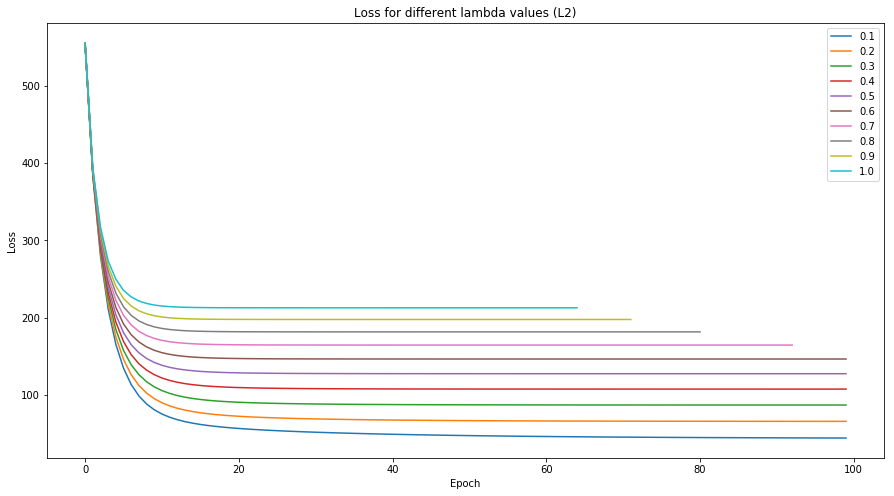

In [33]:
plt.figure(figsize=(15, 8))
for lam in lambda_values:
    plt.plot(range(len(loss[lam])), loss[lam])
plt.legend(lambda_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss for different lambda values (L2)')
plt.show()

Получаем такой график, так как функция потерь напрямую зависит от лямбды умноженной на l2 норму весов, соответственно она будет заметно варьироваться в зависимости от значения этого коэффицента, то есть значение функции в минимуме будет отличаться из-за коэффицента, что и наблюдается на графике

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ridge = Ridge(alpha=0.1, random_state=42)

In [36]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

RMSE of sklearn Ridge regression

In [37]:
np.sqrt(mean_squared_error(ridge.predict(X_test), y_test))

4.928801722209765

MAE of sklearn Ridge regression

In [38]:
mean_absolute_error(ridge.predict(X_test), y_test)

3.188740661363576

Значения обеих метрик для моей реализации ridge регрессии чуть выше графика, опять-таки есть небольшое отличие у метрик разных моделей реализации. Примечательно, что у sklearn моделей обычной регрессии и с l2 регуляризатором значения метрик практически идентичные, это говорит о том, что обычная линейная регрессия не переобучилась на данной выборке. Что касается моей реализации, то она видимо наоборот недообучается, так как регуляризация только уменьшает конечный скор модели.

### 4 (Бонус, 4 балла). 
* Реализуйте обучение линейной регрессии с L1-регуляризацией (класс RegL1)
* Проведите сравнения аналогично пункту 3 (но с Lasso вместо Ridge).

In [39]:
class LinReg_l1():
    def __init__(self, step_size=0.1, num_steps=20, eps=1e-6, lamb=0.1, output=True):
        self.w = None
        self.bias_w = None
        self.b = None
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
        self.loss = []
        self.lamb = lamb
        self.output = output

    def __calc_grad(self, X_train, y_train):
        # Одна итерация градиента
        dot_product = np.dot(X_train, self.w) + self.bias_w[0]
        each_instances_error = dot_product.T - y_train
        # l1 regularization
        self.loss.append(np.mean(each_instances_error ** 2, axis=0) + self.lamb * np.linalg.norm(self.w, 1))
        dw = np.dot(2 / X_train.shape[0] * X_train.T, each_instances_error) + self.lamb
        db = 2 / X_train.shape[0] * each_instances_error
        # Обновление весов
        self.w -= self.step_size * dw
        self.b -= self.step_size * db
    
    def fit(self, X_train, y_train):
        # Инициализация весов
        np.random.seed(42)
        self.w = np.random.randn(X_train.shape[1])
        self.b = np.ones(X_train.shape[0])
        self.bias_w = np.zeros(1)
        
        difference = np.ones(1)
        step_id = 0
        current = 0
        loss_scores = []
        
        # Собственно сам градиентный спуск
        while (difference > self.eps).all() and step_id < self.num_steps:
            previous = self.w.copy()
            self.__calc_grad(X_train, y_train)
            if self.output:
                print('Epoch: {}\nLoss: {}\n'.format((step_id + 1), self.loss[step_id]))
            difference = np.abs(np.linalg.norm(self.w - previous, 1))
            step_id += 1

        
    def predict(self, X_test):
        return np.dot(X_test, self.w) + self.b[0]

In [40]:
kfold = KFold(n_splits=5, random_state=42)
lambda_values = np.linspace(1, 10, 10) / 10

# Ручная кросс-валидация из-за того, что надо вытащить значения
# функции потерь на каждой итерации
loss = {}
scores = {}
for lamb in lambda_values:
    cv_scores = []
    for train_idx, test_idx in kfold.split(X_train, y_train):
        lr_l1 = LinReg_l1(num_steps=100, eps=1e-7, lamb=lamb, output=False)
        lr_l1.fit(X_train[train_idx], y_train[train_idx])
        cv_scores.append(mean_absolute_error(lr_l1.predict(X_train[test_idx]), y_train[test_idx]))
    scores[lamb] = np.mean(cv_scores)
    loss[lamb] = lr_l1.loss

In [41]:
scores

{0.1: 3.9026508012480177,
 0.2: 3.945036691900428,
 0.3: 3.998072906678143,
 0.4: 4.064600995167268,
 0.5: 4.139371363593052,
 0.6: 4.227830579695622,
 0.7: 4.325852479536823,
 0.8: 4.431958788095143,
 0.9: 4.544517341067073,
 1.0: 4.665283702868642}

В случае с реализацией регрессии наилучший скор модель выдает при 0 значении гиперпараметра, модель недообучается из-за регуляризации, возьму значение 0.1 для различия от обычной линейной регрессии из первого пункта дз

In [42]:
lr_l1 = LinReg_l1(num_steps=150, eps=1e-6, lamb=0.1)
lr_l1.fit(X_train, y_train)

Epoch: 1
Loss: 547.6167452179163

Epoch: 2
Loss: 382.31489934658555

Epoch: 3
Loss: 277.1554247572659

Epoch: 4
Loss: 206.85850594130366

Epoch: 5
Loss: 159.50530744681387

Epoch: 6
Loss: 127.49857583539355

Epoch: 7
Loss: 105.75288015290586

Epoch: 8
Loss: 90.87793750689721

Epoch: 9
Loss: 80.60809910713711

Epoch: 10
Loss: 73.42949820422423

Epoch: 11
Loss: 68.33082491464062

Epoch: 12
Loss: 64.64156577796639

Epoch: 13
Loss: 61.900055753106805

Epoch: 14
Loss: 59.80256871619574

Epoch: 15
Loss: 58.14538503402429

Epoch: 16
Loss: 56.7916819018577

Epoch: 17
Loss: 55.64941161450333

Epoch: 18
Loss: 54.65651594507965

Epoch: 19
Loss: 53.771039691996044

Epoch: 20
Loss: 52.964516924007675

Epoch: 21
Loss: 52.21754411389403

Epoch: 22
Loss: 51.516815122184035

Epoch: 23
Loss: 50.853133769194194

Epoch: 24
Loss: 50.22008046076521

Epoch: 25
Loss: 49.613116646784434

Epoch: 26
Loss: 49.028982558830734

Epoch: 27
Loss: 48.465291546742115

Epoch: 28
Loss: 47.92025632210827

Epoch: 29
Loss: 4

RMSE of my implementaion of Lasso regression

In [43]:
np.sqrt(mean_squared_error(lr_l1.predict(X_test), y_test))

5.02500409295293

MAE of my implementation of Lasso regression

In [44]:
mean_absolute_error(lr_l1.predict(X_test), y_test)

3.5940043080876456

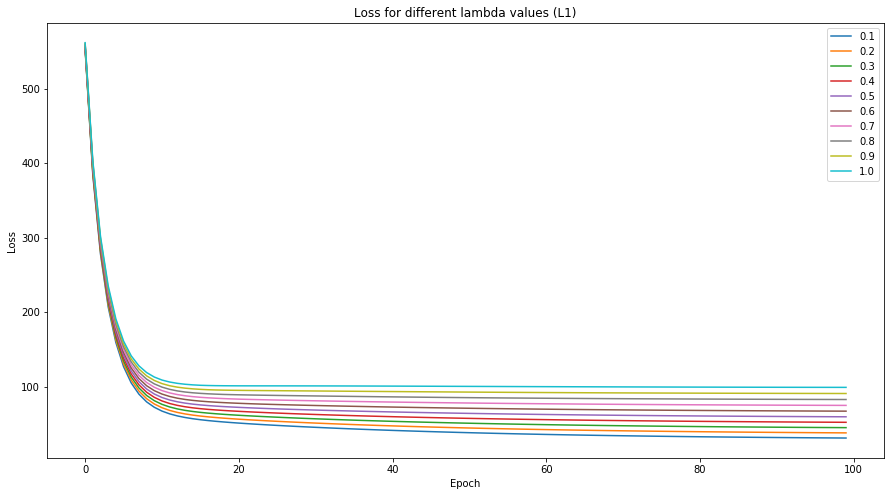

In [45]:
plt.figure(figsize=(15, 8))
for lam in lambda_values:
    plt.plot(range(len(loss[lam])), loss[lam])
plt.legend(lambda_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss for different lambda values (L1)')
plt.show()

Картина идентична как и ее причины, описанные для l2 регуляризации

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lasso = Lasso(alpha=0.1, random_state=42)

In [48]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

RMSE of sklearn Lasso regression

In [49]:
np.sqrt(mean_squared_error(lasso.predict(X_test), y_test))

5.066807787056651

MAE of sklearn Lasso regression

In [50]:
mean_absolute_error(lasso.predict(X_test), y_test)

3.249187795561397

Примечательно, что значение метрики RMSE для моей модели немного лучше, чем от sklearn, однако MAE говорит об обратном.

### 5 (Бонус, 2 балла). 
Исследуйте для реализации регрессии с L2-регуляризацией зависимость качества на тестовой выборке (с графиками) от:
* Длины шага
* Количества шагов спуска
* Константы epsilon.

In [51]:
sizes = np.linspace(1, 5, 10) / 35
scores = []
for step_size in sizes:
    lr_l2 = LinReg_l2(step_size=step_size, num_steps=150, lamb=0.03, output=False)
    lr_l2.fit(X_train, y_train)
    scores.append(mean_absolute_error(lr_l2.predict(X_test), y_test))

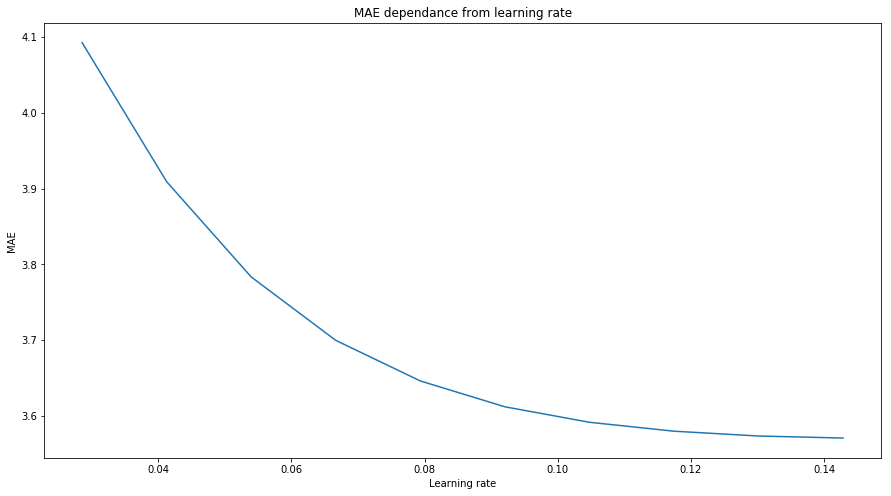

In [52]:
plt.figure(figsize=(15, 8))
plt.plot(sizes, scores)
plt.xlabel('Learning rate')
plt.ylabel('MAE')
plt.title('MAE dependance from learning rate')
plt.show()

Значения примерно равные 0.15 являются наиболее подходящими для этой регрессии. 

2) Количество шагов спуска

In [53]:
num_steps = np.linspace(10, 310, 20)
scores = []
for steps in num_steps:
    lr_l2 = LinReg_l2(num_steps=steps, lamb=0.03, output=False)
    lr_l2.fit(X_train, y_train)
    scores.append(mean_absolute_error(lr_l2.predict(X_test), y_test))

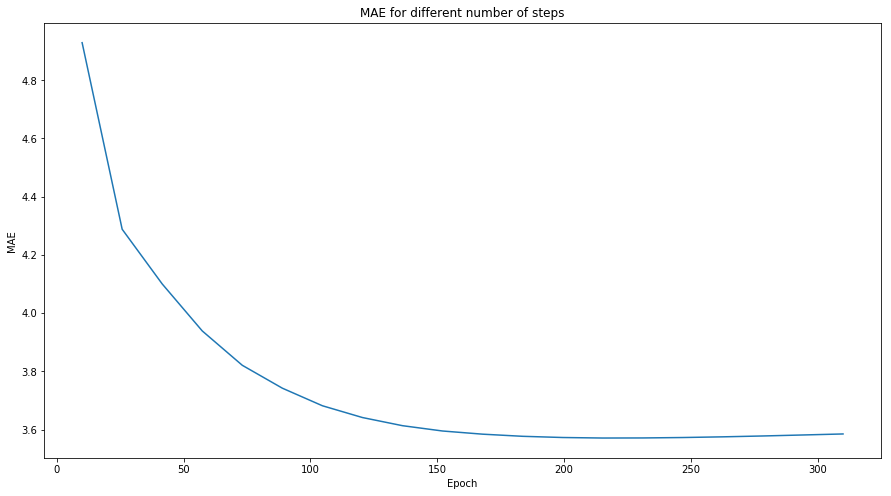

In [54]:
plt.figure(figsize=(15, 8))
plt.plot(num_steps, scores)
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE for different number of steps')
plt.show()

Оптимальное количество шагов для данной модели с разными гиперпараметрами будет находиться
примерно в промежутке от 150 до 250 шагов.

3) eps

In [55]:
eps_val = np.power(10, np.arange(7)) / 10 ** 12
scores = []
for eps in eps_val:
    lr_l2 = LinReg_l2(num_steps=1000000, lamb=0.03, eps=eps, output=False)
    lr_l2.fit(X_train, y_train)
    scores.append(mean_absolute_error(lr_l2.predict(X_test), y_test))

In [56]:
eps_val

array([1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06])

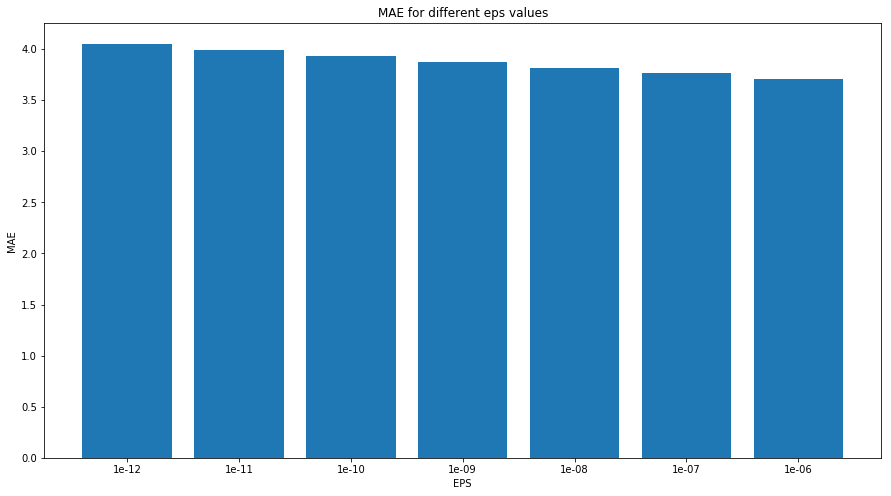

In [57]:
plt.figure(figsize=(15, 8))
plt.bar(range(len(eps_val)), scores)
plt.xlabel('EPS')
plt.xticks(range(len(eps_val)), eps_val)
plt.ylabel('MAE')
plt.title('MAE for different eps values')
plt.show()

Данный график показывает, что модель начинает переобучаться если точность будет чрезвычайно маленькой, поэтому оптимальные значения находятся в пределах 1е-6

### 6 (Бонус, 0 баллов). 
Вставьте сюда любимую картинку, которая сможет поднять настроение ассистенту и семинаристу

<img src="image.png">